In [1]:
import time
import requests
#import bs4
from bs4 import BeautifulSoup

In [2]:
# 100 searches max by month
# https://serpapi.com/dashboard
url = "https://serpapi.com/search.html?engine=google&q=euro+vs+vn+dong&location=France&google_domain=google.fr&gl=fr&hl=fr&api_key=fcc67229497391325ba240fe20b1e0c62dc698e3f5b2cbc935ddf4f33a003bbc"

In [3]:
url = "https://www.boursorama.com/bourse/devises/taux-de-change-euro-dong-EUR-VND/"

Time of process : 0.4096987247467041 s
Processus terminé ! Fichier créé dans Y:\Documents\Python


' <!DOCTYPE html><!--[if lt IE 7]><html lang="fr" class="no-js ie lt-ie10 lt-ie9 lt-ie8 lt-ie7"><![endif]--><!--[if IE 7]><html lang="fr" class="no-js ie lt-ie10 lt-ie9 lt-ie8"><![endif]--><!--[if IE 8]><html lang="fr" class="no-js ie lt-ie10 lt-ie9"><![endif]--><!--[if IE 9]><html lang="fr" class="ie lt-ie10 no-js"><![endif]--><!--[if !IE]><!--><html lang="fr" class="no-js"><!--<![endif]--><head><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><title>Cours Euro Dong, Prix Euro Dong, Six - Forex 2 EUR/VND SPOT - Boursorama</title><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1, minimum-scale=1, user-scalable=no"><meta http-equiv="Accept-CH" content="DPR, Viewport-Width, Width"><meta http-equiv="refresh" content="600"><link rel="preconnect" href="https://cdn.brsimg.com"><link rel="preconnect" href="https://pixel.adsafeprotected.com"><link rel="preconnect" href="https://s.brsimg.com"><link rel="preconnect" href="https://api.
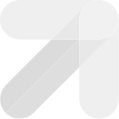
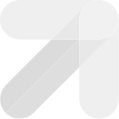

In [4]:

def get_page():
    start = time.time()
    response = requests.get(url)
    #print(response.text)
    html = response.content.decode("utf8")
    text_file = 'response.html'
    end = time.time()
    print('Time of process :',end - start,'s')

    # create index.html
    # https://www.learnbyexample.org/python-open-function/
    with open(text_file,"w",encoding='ascii',errors='ignore') as f:
        f.write(html)
        print("Processus terminé ! Fichier créé dans Y:\Documents\Python")
        #f.close()
    
    return html
  
html = get_page()
html

In [5]:
def get_soup_class(cls, selector="span"):
    # beautiful soup bs4
    start = time.time()
    soup = BeautifulSoup(requests.get(url).content, "html.parser")
    target = soup.find(selector,class_=cls)
    key = soup.find(selector,class_=cls).text    #["data-value"]
    print(target,key)
    end = time.time()
    print('Time of process :',end - start,'s')
    print('1 euro = ',key,'dong VN')
    return key

In [6]:
import re

# DFlfde SwHCTb <= 2 classes
# serpapi
cls = "SwHCTb"
# bousorama
cls = "c-instrument--last"
key = get_soup_class(cls)
key

<span class="c-instrument c-instrument--last" data-ist-last="">26 415.54</span> 26 415.54
Time of process : 0.5043900012969971 s
1 euro =  26 415.54 dong VN


'26 415.54'

In [7]:
s = '1 euro = '+key+' dong VN'

In [8]:
re.search(r".\s",s)


<re.Match object; span=(0, 2), match='1 '>

In [9]:

# debut de chaine
re.match(r".\s",s)


<re.Match object; span=(0, 2), match='1 '>

In [10]:
s,re.findall(r"[0-9]\s[0-9]",s)

('1 euro = 26 415.54 dong VN', ['6 4'])

In [11]:
re.finditer(r"\s",s)

In [12]:
re.findall(r"[0-9]\s[0-9]",s)

['6 4']

In [13]:
re.finditer(r"[0-9]\s[0-9]",s)

In [14]:
re.search(r".",key)

<re.Match object; span=(0, 1), match='2'>

In [15]:
key = re.sub(r"\s","",key)
key

'26415.54'

In [16]:
key = re.subn(" ","",key)
key


('26415.54', 0)

In [17]:
s = '1 euro = '+key[0]+' dong VN'
s

'1 euro = 26415.54 dong VN'

In [18]:
url='https://www.boursorama.com/bourse/devises/taux-de-change-euro-dong-EUR-VND/'

In [19]:
import pandas as pd
tables = pd.read_html(url)[0:3] 
# default flavor='lxml'
tables

[  Unnamed: 0 16 November16-11 17 November17-11 20 November20-11  \
 0       Der.       26 363.694       26 486.461       26 507.893   
 1       Var.            0.07%            0.46%            0.08%   
 2       Ouv.       26 353.695       26 361.265       26 486.461   
 3      +Haut       26 468.144       26 486.461       26 532.116   
 4       +Bas       26 303.738       26 254.825       26 430.381   
 5       Vol.                0                0                0   
 
   21 November21-11 22 November22-11  
 0       26 479.181       26 425.236  
 1           -0.11%           -0.20%  
 2       26 505.471       26 476.755  
 3       26 561.292       26 508.299  
 4       26 450.063       26 370.721  
 5                0                0  ,
         période    var.     + haut      + bas
 0   1er Janvier  +4.49%  26 667.12  24 604.77
 1     1 semaine  +0.28%  26 561.29  26 254.82
 2        1 mois  +0.68%  26 561.29  25 870.08
 3        3 mois  +1.76%  26 561.29  25 486.29
 4        6 m

In [20]:
df = pd.read_html(url, match='MM')[0].fillna('0')    # table contenant 'MM'
df['+ haut']=[pd.to_numeric(k.replace(' ','')) for k in df['+ haut']]
df['+ bas']=[pd.to_numeric(k.replace(' ','')) for k in df['+ bas']]
df

,période,var.,+ haut,+ bas
0,1er Janvier,+4.49%,26667.12,24604.77
1,1 semaine,+0.28%,26561.29,26254.82
2,1 mois,+0.68%,26561.29,25870.08
3,3 mois,+1.76%,26561.29,25486.29
4,6 mois,+4.24%,26667.12,24981.51
5,1 an,+3.17%,26667.12,24604.77
6,3 ans,-3.70%,28518.08,22658.62
7,5 ans,-0.79%,28518.08,22658.62
8,10 ans,-7.60%,29484.24,22379.40
9,MM20,0,0.00,26195.26


<Axes: >

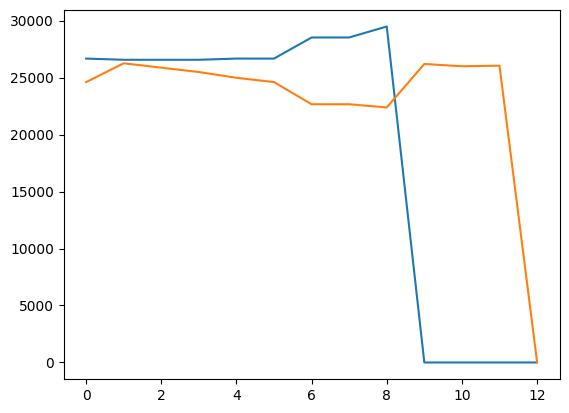

In [21]:
df['+ haut'].plot()
df['+ bas'].plot()

In [22]:
devise_parite = tables[2]
devise_parite

,Libellé,Monnaie,Dernier,Var
0,Canada,Dollar Canadien - CAD,1.4941,-0.07%
1,Chine,Yuan Renminbi - CNY,7.7702,+0.15%
2,États-Unis,Dollar - USD,1.0897,-0.15%
3,Inde,Roupie - INR,90.8150,-0.13%
4,Israël,Shekel - ILS,4.0672,+0.29%
5,Japon,Yen - JPY,162.5300,+0.46%
6,Pologne,Zloty - PLN,4.3760,+0.15%
7,Royaume-Uni,Livre Sterling - GBP,0.8702,-0.03%
8,Russie,Rouble - RUB,96.1329,-0.16%
9,Suisse,Franc Suisse - CHF,0.9642,-0.03%


In [23]:
data_hist5J = tables[0]
data_hist5J

,Unnamed: 0,16 November16-11,17 November17-11,20 November20-11,21 November21-11,22 November22-11
0,Der.,26 363.694,26 486.461,26 507.893,26 479.181,26 425.236
1,Var.,0.07%,0.46%,0.08%,-0.11%,-0.20%
2,Ouv.,26 353.695,26 361.265,26 486.461,26 505.471,26 476.755
3,+Haut,26 468.144,26 486.461,26 532.116,26 561.292,26 508.299
4,+Bas,26 303.738,26 254.825,26 430.381,26 450.063,26 370.721
5,Vol.,0,0,0,0,0


In [24]:
'''
cols=data_hist5J.columns
data_hist5J.loc[2:,cols[1]]=[pd.to_numeric(k.replace(' ','')) for k in data_hist5J.loc[2:,cols[1]].values]
[k for k in data_hist5J.loc[:]]
data_hist5J.info()
'''

"\ncols=data_hist5J.columns\ndata_hist5J.loc[2:,cols[1]]=[pd.to_numeric(k.replace(' ','')) for k in data_hist5J.loc[2:,cols[1]].values]\n[k for k in data_hist5J.loc[:]]\ndata_hist5J.info()\n"

In [25]:
url = 'https://www.boursorama.com/bourse/devises/parite'
df2 = pd.read_html(url)[0]
df2

,Libellé,Monnaie,Dernier,Var
0,Afghanistan,Afghani - AFN,75.4380,+0.15%
1,Afrique du Sud,Rand - ZAR,20.4045,+0.49%
2,Albanie,Lek - ALL,103.1939,-0.31%
3,Algérie,Dinar Algérien - DZD,146.2950,-0.01%
4,Angola,Kwanza - AOA,912.9384,-0.14%
...,...,...,...,...
152,Vanuatu,Vatu - VUV,131.2991,-0.10%
153,Vénézuela,Bolívar Fuerté - VEF,284 299.4038,0.00%
154,Viêt Nam,Dong - VND,26 415.5402,-0.24%
155,Yémen,Rial Du Yémen - YER,272.7373,-0.14%


In [26]:
df2[df2['Libellé']=='Viêt Nam']


,Libellé,Monnaie,Dernier,Var
154,Viêt Nam,Dong - VND,26 415.5402,-0.24%
